In [1]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid", context="notebook", font_scale=1.5)

In [2]:
df = pd.read_csv('amz_us_price_prediction_dataset.csv')

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
category              object
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735414 entries, 0 to 1735413
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   category           object 
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 107.6+ MB


In [6]:
df.shape

(1735414, 9)

In [7]:
df.size

15618726

### Data Cleaning

In [8]:
df.isnull().sum()

uid                  0
asin                 0
title                1
stars                0
reviews              0
price                0
category             0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [9]:
df.duplicated().sum()

0

### EDA

In [10]:
df['category'].value_counts().count()

236

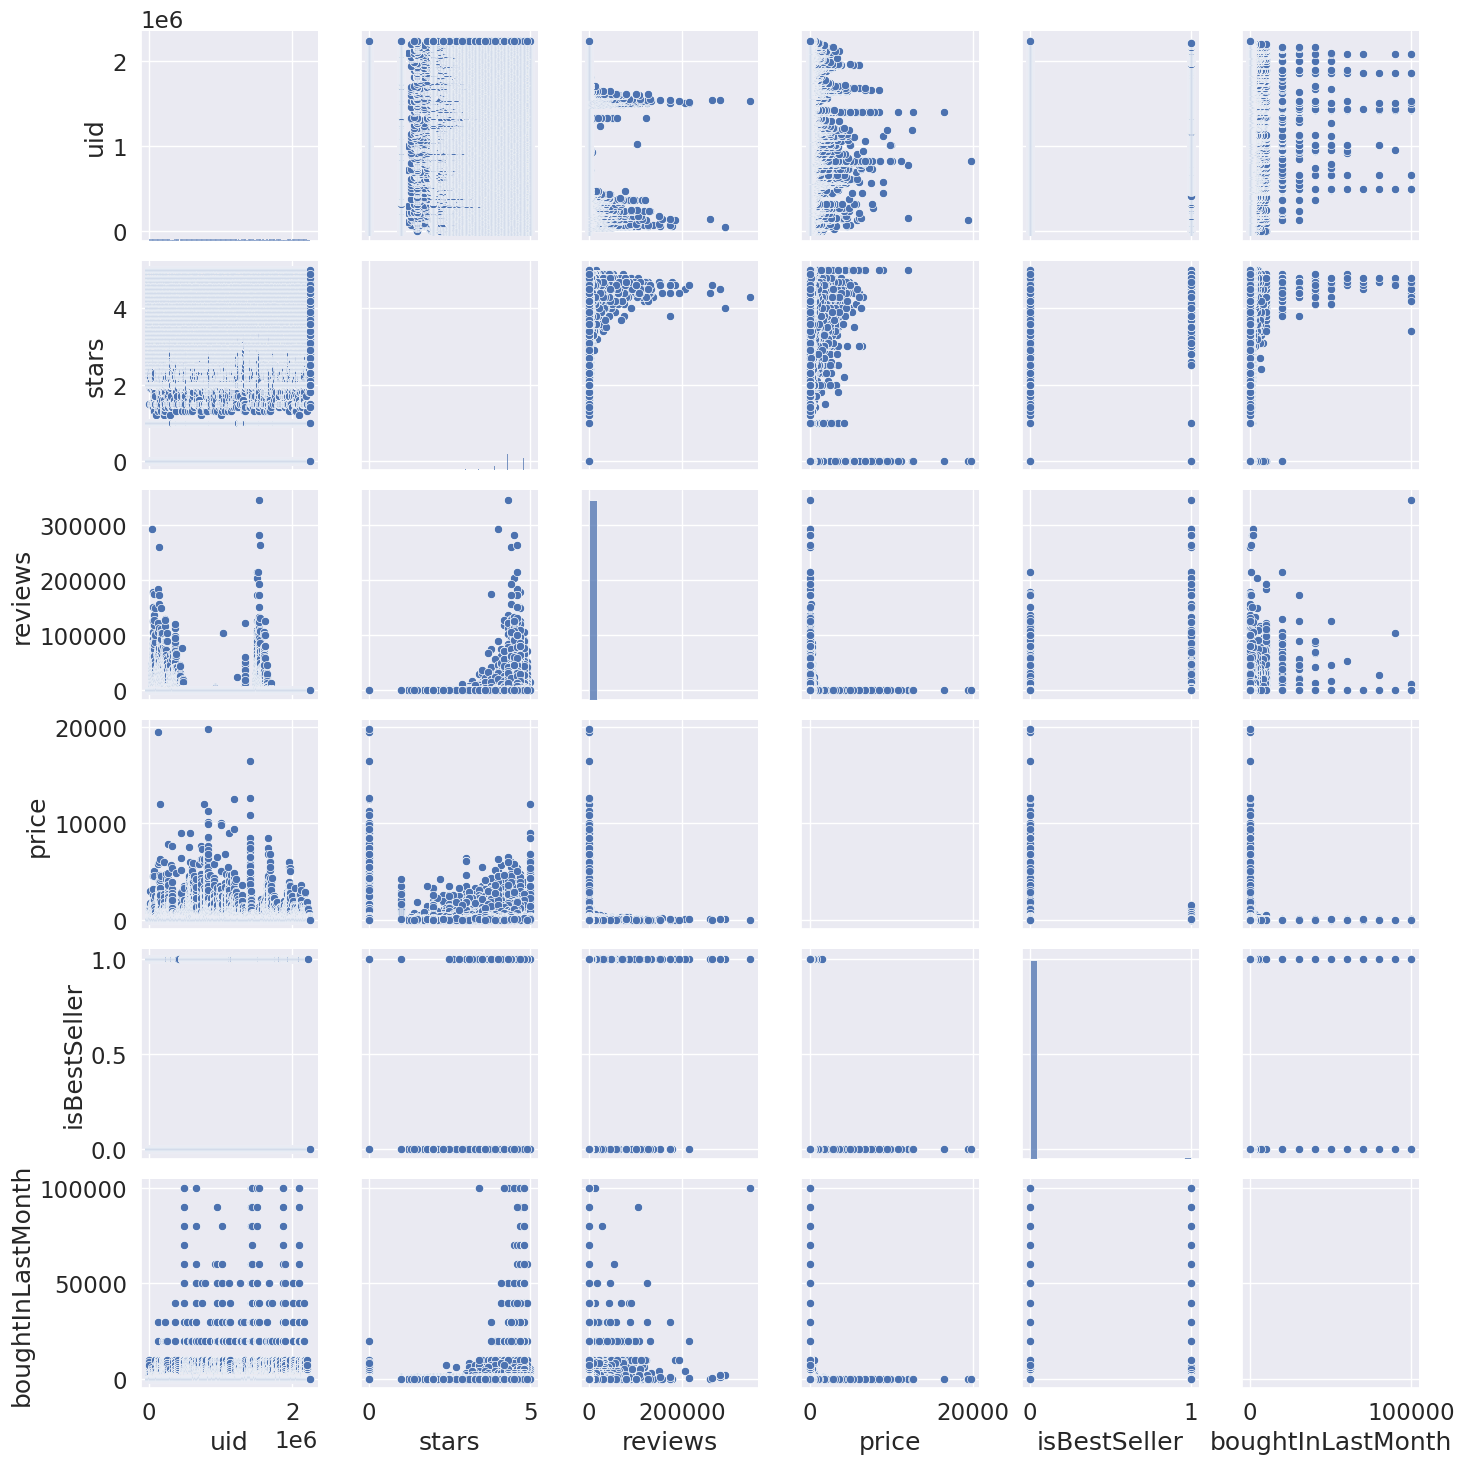

In [11]:
sns.pairplot(df)

In [12]:
mask = df[df['isBestSeller'] == True]

In [13]:
mask = mask['category'].value_counts().nlargest(5)
mask = pd.DataFrame(mask)
mask


,count
category,
Sports & Outdoors,819
Tools & Home Improvement,729
Industrial & Scientific,666
Sports & Fitness,564
Kitchen & Dining,488


Text(0, 0.5, 'Items')

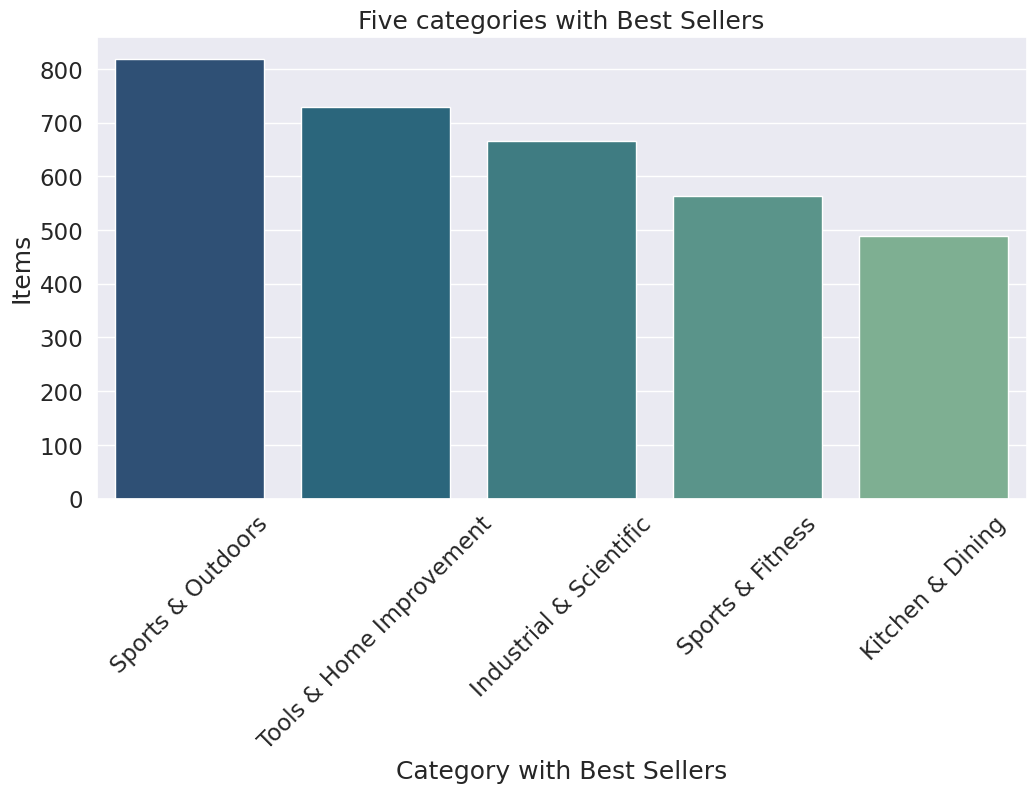

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=mask.index, y=mask['count'], palette="crest_r")
plt.title('Five categories with Best Sellers')
plt.xticks(rotation=45)
plt.xlabel('Category with Best Sellers')
plt.ylabel('Items')

In [15]:
category = df.category.value_counts().nlargest(5)
category = pd.DataFrame(category)

Text(0, 0.5, 'Itens selled')

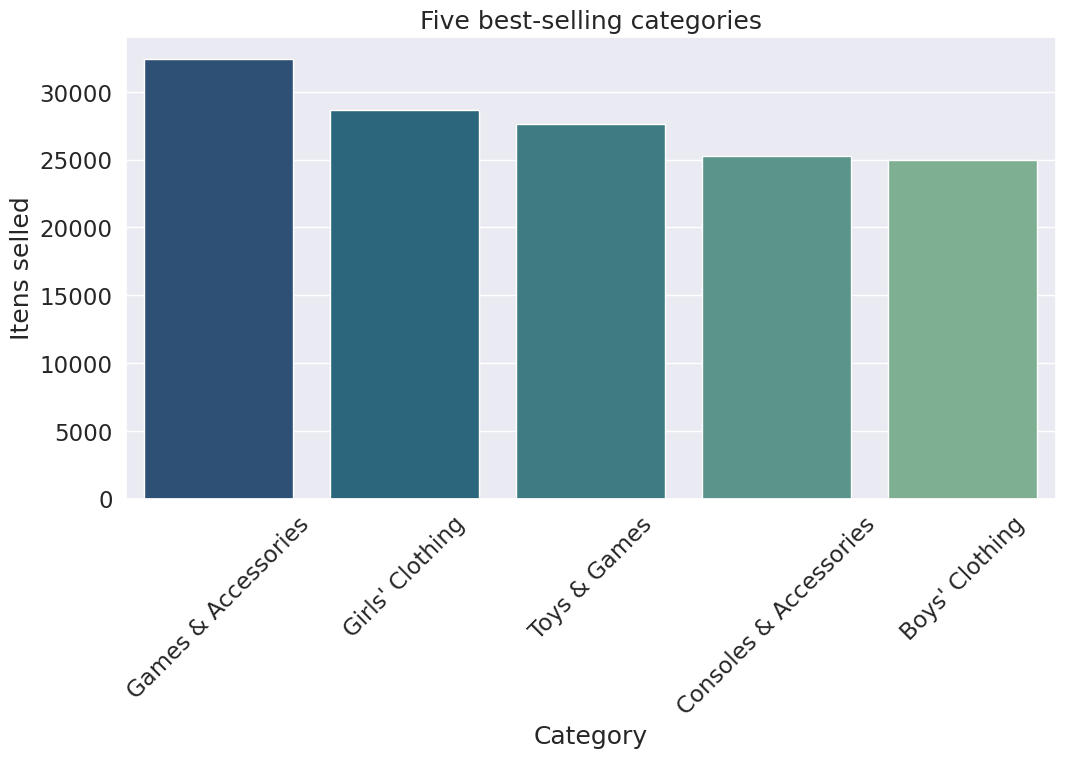

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=category.index, y=category['count'], palette="crest_r")
plt.title('Five best-selling categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Itens selled')

In [17]:
stars = df.groupby('category')['stars'].mean().nlargest(5)
stars = pd.DataFrame(stars)
stars

,stars
category,
Gift Cards,4.832374
Kitchen & Dining,4.556086
Food Service Equipment & Supplies,4.543653
Industrial & Scientific,4.539780
Power Tools & Hand Tools,4.526788


Text(0, 0.5, 'Rating')

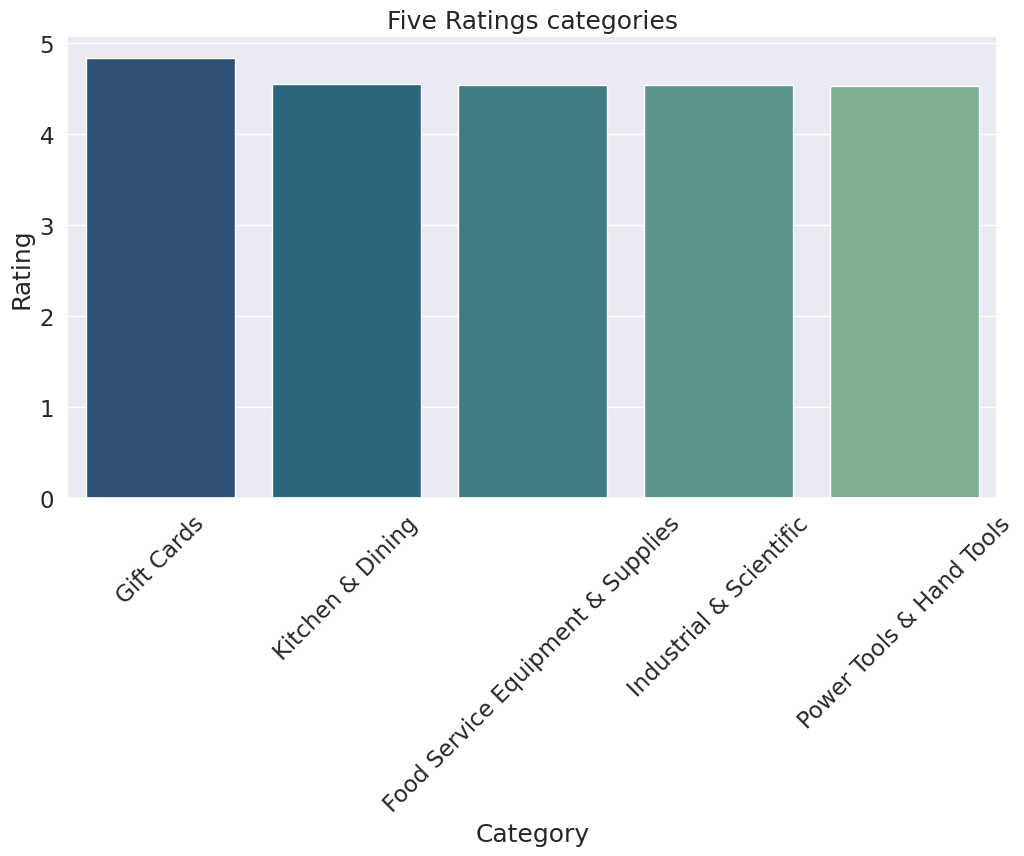

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x=stars.index, y=stars['stars'], palette="crest_r")
plt.title('Five Ratings categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Rating')

Text(0, 0.5, 'Price')

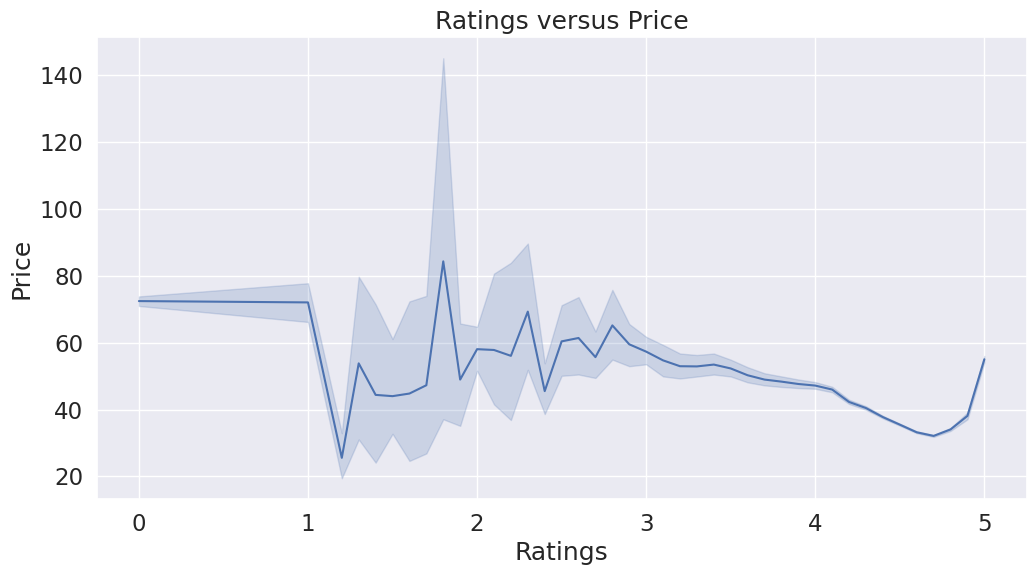

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['stars'], y=df['price'], palette="flare")
plt.title('Ratings versus Price')
plt.xlabel('Ratings')
plt.ylabel('Price')

Text(0, 0.5, 'Sold')

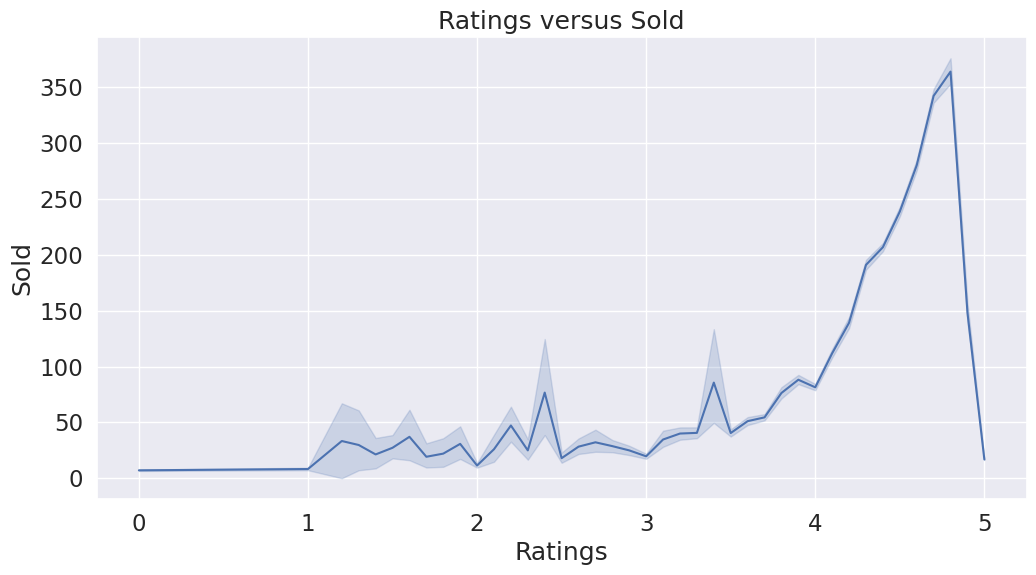

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['stars'], y=df['boughtInLastMonth'], palette="flare")
plt.title('Ratings versus Sold')
plt.xlabel('Ratings')
plt.ylabel('Sold')

Text(0, 0.5, 'Number of Reviews')

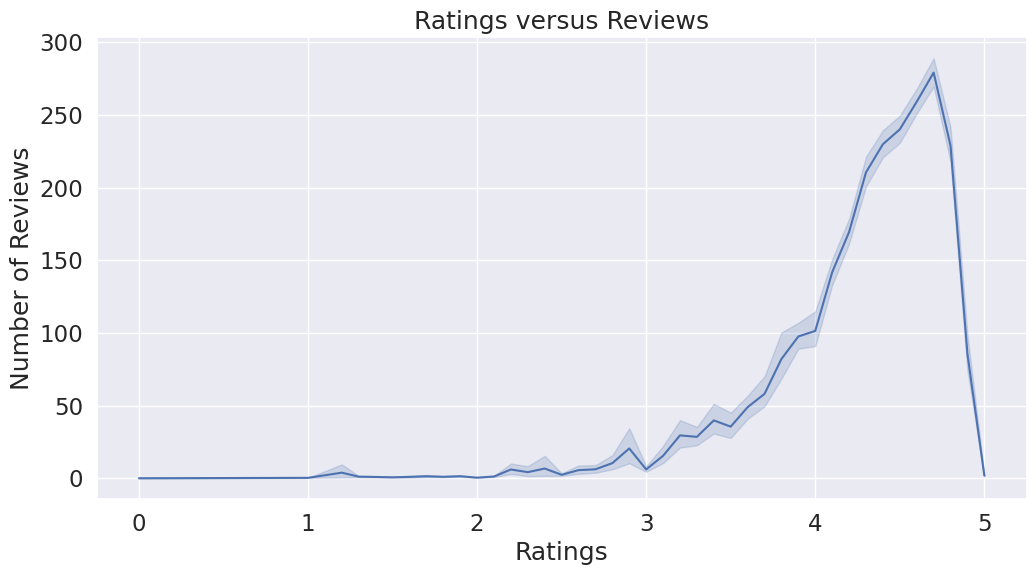

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['stars'], y=df['reviews'], palette="flare")
plt.title('Ratings versus Reviews')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735414 entries, 0 to 1735413
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   category           object 
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 107.6+ MB


Text(0, 0.5, 'Price')

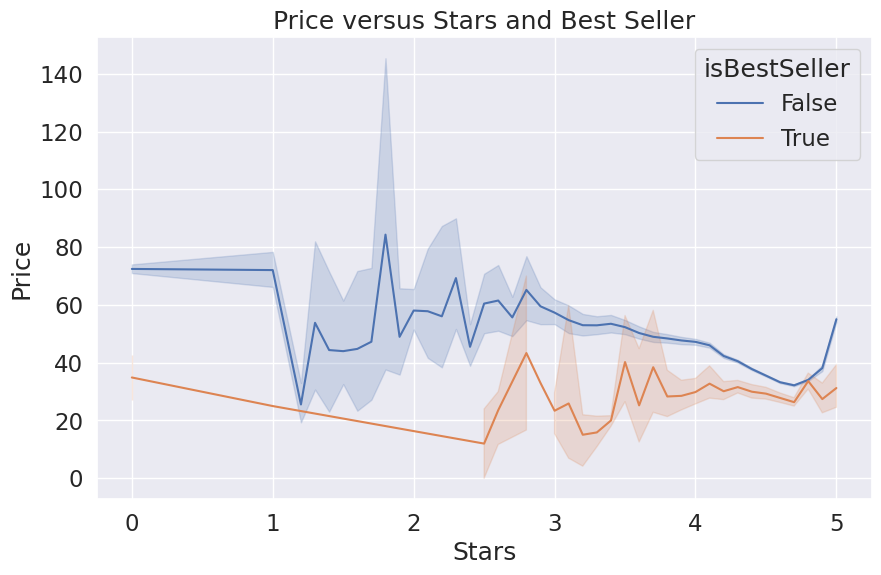

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['stars'], y=df['price'], hue=df['isBestSeller'])
plt.title('Price versus Stars and Best Seller')
plt.xlabel('Stars')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

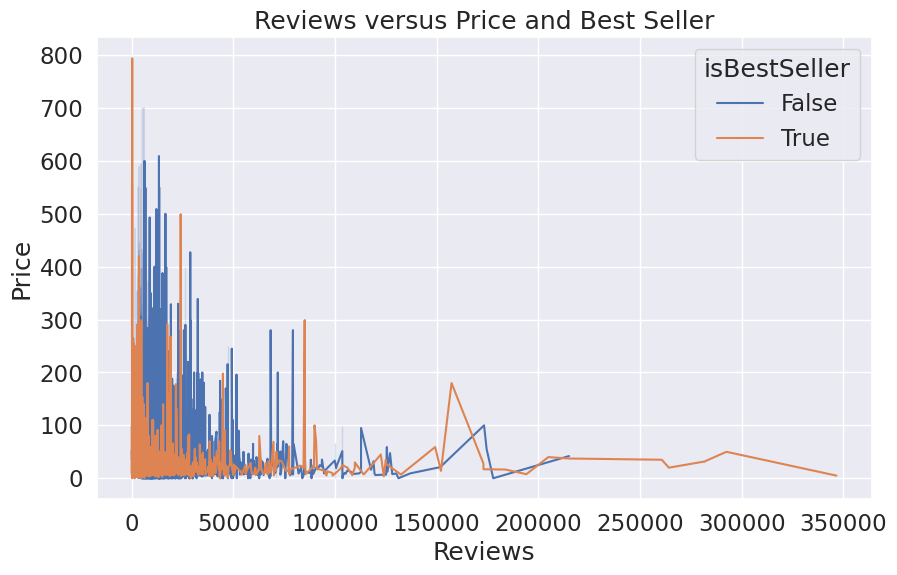

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['reviews'], y=df['price'], hue=df['isBestSeller'])
plt.title('Reviews versus Price and Best Seller')
plt.xlabel('Reviews')
plt.ylabel('Price')


In [ ]:
sns.